In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
input_fname = 'test_toymodel.in'
np.set_printoptions(formatter={'float': lambda x: format(x, '1.3E')})

### 1. read InputFile

In [2]:
beam, lattice = impact.readInputFile(input_fname)

reading ImpactZ input file (test_toymodel.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [3]:
for i in range(len(lattice)-1,0,-1):
    if lattice[i].type == 'write_raw_ptcl':
        lattice.pop(i)

In [4]:
lattice[0].turns = 2**14

In [5]:
lattice[1].n_sckick = int(lattice[1].length*20)
print(lattice[1])


             length: 1.8 [m]
           n_sckick: 36 [1]
              n_map: 10 [1]
         strength_t: 0.4
 transverse_scale_c: 0.01
       tune_advance: 0.3034496449165134
        pipe_radius: 10.0 [m]
               type: 'nonlinear_insert'


In [6]:
lattice[2]


      nonlinear_insert_length: 1.8
 nonlinear_insert_tuneAdvance: 0.3034496449165134
                 tune_advance: 0.0
                         type: 'linear_matrix_map'

### 2. particle random generator : IOTA_Gauss distribution 

In [7]:
print(beam.distribution)


 distribution_type: 'ReadFile'
              mode: 'twiss'
              betz: 13490997720687.232 [degree/MeV]
              alfz: 0.0
             emitz: 1.187685961430756e-09 [degree-MeV]
            scalez: 1.0 [1.0]
           scalepz: 1.0 [1.0]
           offsetz: 0.0 [degree]
          offsetpz: 0.0 [MeV]
              betx: 1.90650539547772 [m]
              alfx: 1.4082261070868625
             emitx: 1.460964633548756e-07 [m-rad]
            scalex: 1.0 [1.0]
           scalepx: 1.0 [1.0]
           offsetx: 0.0 [m]
          offsetpx: 0.0 [rad]
              bety: 1.90650539547772 [m]
              alfy: 1.4082261070868625
             emity: 1.460964633548756e-07 [m-rad]
            scaley: 1.0 [1.0]
           scalepy: 1.0 [1.0]
           offsety: 0.0 [m]
          offsetpy: 0.0 [rad]


In [8]:
dist = beam.distribution
dist.distribution_type = 'IOTA_Gauss'
dist.NL_t = 0.4
dist.NL_c = 0.01
dist.CL = 3.0
beam.n_particles = 2**12

### run

In [9]:
beam.nCore_y = 2
beam.nCore_z = 2
beam.current = 0.0
impact.writeInputFile(beam,lattice)
# impact.run(4)

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles
input error <- beam.multi_charge.current[0] not qual to beam.current
  ... enforcing  beam.multi_charge.current[0] to beam.current


### plot

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
Idata = np.loadtxt('fort.81')

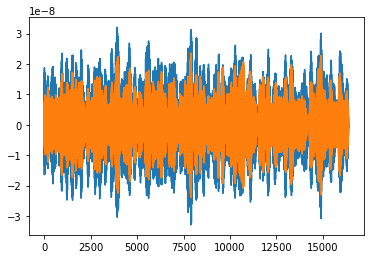

In [12]:
plt.plot(Idata[:,1]/np.mean(Idata[:,1])-1.0)
plt.plot(Idata[:,2]/np.mean(Idata[:,2])-1.0)